# Comparison of model outputs

Aims: Compare probability predictions from logistic regression, random forests, and neural networks

## Import libraries

In [1]:
# Turn warnings off to keep notebook tidy
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [2]:
model_probs_test = pd.read_csv(
    './individual_model_output/probabilities_test.csv')

## Compare probababilties

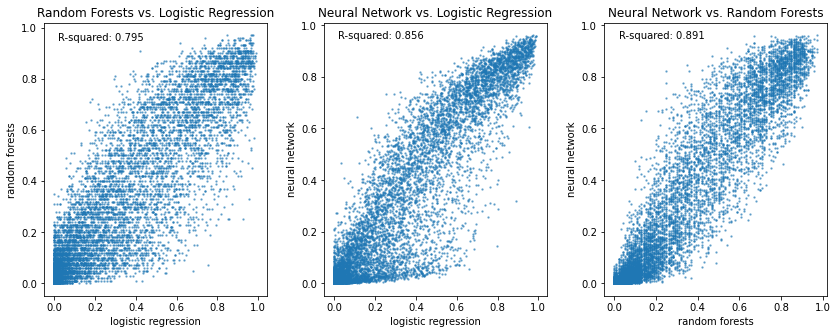

In [3]:
fig = plt.figure(figsize=(12,5))



# Random Forests vs. Logistic Regression
ax1 = fig.add_subplot(131)
r_square = np.corrcoef(model_probs_test['logistic_regression'],
           model_probs_test['random_forest'])[0][1] ** 2

ax1.scatter(model_probs_test['logistic_regression'],
           model_probs_test['random_forest'],
           alpha=0.5, s=2)
ax1.set_xlabel('logistic regression')
ax1.set_ylabel('random forests')
ax1.set_title('Random Forests vs. Logistic Regression')
txt = f'R-squared: {r_square:0.3f}'
ax1.text(0.02, 0.95, txt)

# Neural network vs. Logistic Regression
ax2 = fig.add_subplot(132)
r_square = np.corrcoef(model_probs_test['logistic_regression'],
           model_probs_test['neural_net'])[0][1] ** 2

ax2.scatter(model_probs_test['logistic_regression'],
           model_probs_test['neural_net'],
           alpha=0.5, s=2)
ax2.set_xlabel('logistic regression')
ax2.set_ylabel('neural network')
ax2.set_title('Neural Network vs. Logistic Regression')
txt = f'R-squared: {r_square:0.3f}'
ax2.text(0.02, 0.95, txt)

# Neural Network vs. Random Forests
ax3 = fig.add_subplot(133)
r_square = np.corrcoef(model_probs_test['random_forest'],
           model_probs_test['neural_net'])[0][1] ** 2

ax3.scatter(model_probs_test['random_forest'],
           model_probs_test['neural_net'],
           alpha=0.5, s=2)
ax3.set_xlabel('random forests')
ax3.set_ylabel('neural network')
ax3.set_title('Neural Network vs. Random Forests')
txt = f'R-squared: {r_square:0.3f}'
ax3.text(0.02, 0.95, txt)

plt.tight_layout(pad=2)
plt.savefig('./ensemble_output/model_fits_scatter.jpg', dpi=300)
plt.show()

## Compare classification

In [4]:
classification = model_probs_test >= 0.5

Check agreement between logistic regression and random forests

In [5]:
agree = classification['logistic_regression'] == classification['random_forest']
np.mean(agree)

0.8925

Check agreement between logistic regression and neural network

In [6]:
agree = classification['logistic_regression'] == classification['neural_net']
np.mean(agree)

0.9175

Check agreement between random forests and neural network

In [7]:
agree = classification['random_forest'] == classification['neural_net']
np.mean(agree)

0.9262

Check agreement between all three model types

In [10]:
agree = (classification['logistic_regression'] == classification['random_forest']) & \
    (classification['logistic_regression'] == classification['neural_net'])
np.mean(agree)

0.8681